In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Values in range of -1 and 1
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
X.shape

(768, 8)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [ ]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'Adam', loss='binary_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[ 0.313555  ,  0.35129958,  0.06634641,  0.14441627, -0.21143655,
         -0.23600033,  0.11452562,  0.32754213,  0.0599243 ,  0.14728135,
         -0.33480328, -0.1790594 , -0.3113005 ,  0.08733001,  0.25490427,
         -0.2291229 , -0.11205879, -0.35322687, -0.38321298,  0.06255367,
         -0.16998164,  0.2738251 ,  0.23864347, -0.29744998, -0.157091  ,
          0.00880417,  0.2599389 ,  0.00145093,  0.29893118, -0.25021595,
         -0.10313439, -0.3451375 ],
        [ 0.22704673, -0.15100622, -0.17577915,  0.21795613, -0.31495193,
          0.1730277 ,  0.29640758,  0.16131061, -0.02483231, -0.13280573,
          0.32943904,  0.29037678, -0.26666218, -0.20919871, -0.08126628,
         -0.19269817,  0.11589032, -0.09965265, -0.130048  , -0.36387238,
         -0.20749219, -0.3122935 , -0.03167278, -0.07691693,  0.23703551,
          0.3347261 , -0.01826838,  0.12015867,  0.02195039, -0.16075335,
          0.23584723, -0.2989335 ],
        [-0.05920711,  0.19655389, -0.27

In [ ]:
history = model.fit(X_train,y_train,epochs=10,batch_size=30,validation_data=(X_test, y_test))

Epoch 1/10
21/21 [==============================] - 1s 18ms/step - loss: 0.6560 - accuracy: 0.6270 - val_loss: 0.6424 - val_accuracy: 0.6883
Epoch 2/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6044 - accuracy: 0.7280 - val_loss: 0.5971 - val_accuracy: 0.7597
Epoch 3/10
21/21 [==============================] - 0s 5ms/step - loss: 0.5685 - accuracy: 0.7508 - val_loss: 0.5603 - val_accuracy: 0.7922
Epoch 4/10
21/21 [==============================] - 0s 6ms/step - loss: 0.5408 - accuracy: 0.7443 - val_loss: 0.5365 - val_accuracy: 0.7922
Epoch 5/10
21/21 [==============================] - 0s 5ms/step - loss: 0.5218 - accuracy: 0.7476 - val_loss: 0.5177 - val_accuracy: 0.8052
Epoch 6/10
21/21 [==============================] - 0s 6ms/step - loss: 0.5074 - accuracy: 0.7459 - val_loss: 0.5065 - val_accuracy: 0.7922
Epoch 7/10
21/21 [==============================] - 0s 4ms/step - loss: 0.4974 - accuracy: 0.7541 - val_loss: 0.4955 - val_accuracy: 0.7857
Epoch 8/10
21/21 [=

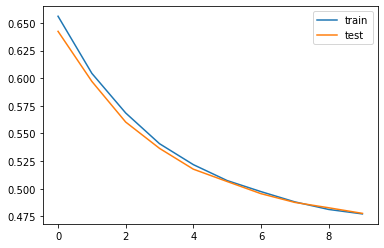

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

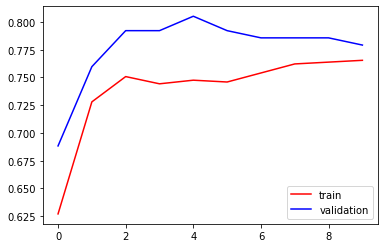

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# how to select appropraite optimizer
# how to choose no. of nodes in layer
# how to select number of hidden layers
# Making all in all model selecting all above parameters right

In [ ]:
pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import kerastuner as kt

<ipython-input-17-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
# How to select appropriate optimizer

def build_model(hp):  # hp is object
  model = Sequential()
  model.add(Dense(32,activation='relu',input_dim=8))
  model.add(Dense(1,activation='sigmoid'))

  optimizer = hp.Choice('optimizer',values = ['adam','rmsprop','sgd','adadelta'])
  model.compile(optimizer = optimizer,loss = 'binary_crossentropy',metrics=['accuracy'])
  return model


In [ ]:
tuner = kt.RandomSearch(build_model, objective = 'val_accuracy',max_trials = 5) # Make tuner object

In [ ]:
tuner.search(X_train,y_train,epochs=5, validation_data = (X_test,y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
20/20 [==============================] - 1s 14ms/step - loss: 0.5710 - accuracy: 0.7329 - val_loss: 0.5546 - val_accuracy: 0.7857
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5470 - accuracy: 0.7557 - val_loss: 0.5350 - val_accuracy: 0.7922
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5284 - accuracy: 0.7557 - val_loss: 0.5221 - val_accuracy: 0.7922
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5134 - accuracy: 0.7606 - val_loss: 0.5126 - val_accuracy: 0.7922
Epoch 11/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5013 - accuracy: 0.7655 - val_loss: 0.5033 - val_accuracy: 0.7857
Epoch 12/100
20/20 [==============================] - 0s 14ms/step - loss: 0.4913 - accuracy: 0.7704 - val_loss: 0.4961 - val_accuracy: 0.7987
Epoch 13/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4829 - accuracy: 0.7736 - val_loss: 0.4903 - val_accuracy: 0.7987
Epoch 

In [ ]:
# To choose right number of neurons in layer

def build_model(hp):  # hp is object
  model = Sequential()
  units = hp.Int('units',min_value = 8,max_value = 128) #OR units = hp.Int('units',min_value = 8,max_value = 128,step=8)
  model.add(Dense(units=units,activation='relu',input_dim=8))
  model.add(Dense(1,activation='sigmoid'))

  
  model.compile(optimizer ='rmsprop',loss = 'binary_crossentropy',metrics=['accuracy'])
  return model


In [ ]:
tuner = kt.RandomSearch(build_model, objective = 'val_accuracy',max_trials = 5,directory='mydir',project_name='Project1') # Make tuner object

In [ ]:
tuner.search(X_train,y_train,epochs=5, validation_data = (X_test,y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'units': 96}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
model.fit(X_train,y_train,batch_size = 30,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
21/21 [==============================] - 1s 18ms/step - loss: 0.5367 - accuracy: 0.7443 - val_loss: 0.5125 - val_accuracy: 0.7922
Epoch 8/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5098 - accuracy: 0.7541 - val_loss: 0.4902 - val_accuracy: 0.7922
Epoch 9/100
21/21 [==============================] - 0s 6ms/step - loss: 0.4919 - accuracy: 0.7720 - val_loss: 0.4779 - val_accuracy: 0.7857
Epoch 10/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4796 - accuracy: 0.7818 - val_loss: 0.4696 - val_accuracy: 0.7987
Epoch 11/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4710 - accuracy: 0.7834 - val_loss: 0.4628 - val_accuracy: 0.7987
Epoch 12/100
21/21 [==============================] - 0s 7ms/step - loss: 0.4652 - accuracy: 0.7752 - val_loss: 0.4605 - val_accuracy: 0.7987
Epoch 13/100
21/21 [==============================] - 0s 6ms/step - loss: 0.4610 - accuracy: 0.7850 - val_loss: 0.4592 - val_accuracy: 0.7987
Epoch 14

In [ ]:
# How to select number of hidden layers

def build_model(hp):  # hp is object
  model = Sequential()
  model.add(Dense(72,activation='relu',input_dim=8))

  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    model.add(Dense(72,activation='relu'))
    
  model.add(Dense(1,activation='sigmoid'))
  
  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.RandomSearch(build_model, objective = 'val_accuracy',max_trials = 5,directory='mydir',project_name='Project2') # Make tuner object

In [ ]:
tuner.search(X_train,y_train,epochs=5, validation_data = (X_test,y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 9}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
model.fit(X_train,y_train,batch_size = 30,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
21/21 [==============================] - 6s 56ms/step - loss: 0.4620 - accuracy: 0.7704 - val_loss: 0.5158 - val_accuracy: 0.8052
Epoch 8/100
21/21 [==============================] - 0s 13ms/step - loss: 0.4500 - accuracy: 0.7834 - val_loss: 0.5083 - val_accuracy: 0.8052
Epoch 9/100
21/21 [==============================] - 0s 13ms/step - loss: 0.4330 - accuracy: 0.7948 - val_loss: 0.5240 - val_accuracy: 0.8117
Epoch 10/100
21/21 [==============================] - 0s 10ms/step - loss: 0.4140 - accuracy: 0.7915 - val_loss: 0.4959 - val_accuracy: 0.7857
Epoch 11/100
21/21 [==============================] - 0s 13ms/step - loss: 0.4024 - accuracy: 0.8274 - val_loss: 0.5149 - val_accuracy: 0.7987
Epoch 12/100
21/21 [==============================] - 0s 18ms/step - loss: 0.3910 - accuracy: 0.8192 - val_loss: 0.4848 - val_accuracy: 0.7857
Epoch 13/100
21/21 [==============================] - 0s 16ms/step - loss: 0.3657 - accuracy: 0.8306 - val_loss: 0.5298 - val_accuracy: 0.7597
Ep

In [ ]:
def build_model(hp):  # hp is object
  model = Sequential()
  counter = 0

  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    if counter == 0:
      model.add(Dense(hp.Int('units' +str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid']),input_dim=8))
      model.add(Dropout(hp.Choice('dropout' +str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    
    else:
      model.add(Dense(hp.Int('units' +str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid']),input_dim=8))
      model.add(Dropout(hp.Choice('dropout' +str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    counter+=1
    
  model.add(Dense(1,activation='sigmoid'))
  
  model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam','adadelta']),loss='binary_crossentropy',metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.RandomSearch(build_model, objective = 'val_accuracy',max_trials = 5,directory='mydir',project_name='Project3')

In [ ]:
tuner.search(X_train,y_train,epochs=5, validation_data = (X_test,y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 4,
 'units0': 64,
 'activation0': 'sigmoid',
 'optimizer': 'rmsprop',
 'units1': 32,
 'activation1': 'tanh',
 'units2': 64,
 'activation2': 'tanh',
 'units3': 96,
 'activation3': 'sigmoid',
 'units4': 120,
 'activation4': 'relu',
 'units5': 32,
 'activation5': 'tanh'}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
model.fit(X_train,y_train,batch_size = 30,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
21/21 [==============================] - 1s 12ms/step - loss: 0.5173 - accuracy: 0.7378 - val_loss: 0.4775 - val_accuracy: 0.7792
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5238 - accuracy: 0.7378 - val_loss: 0.4822 - val_accuracy: 0.7727
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4959 - accuracy: 0.7508 - val_loss: 0.5254 - val_accuracy: 0.7468
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4949 - accuracy: 0.7492 - val_loss: 0.4896 - val_accuracy: 0.7597
Epoch 11/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.7492 - val_loss: 0.4766 - val_accuracy: 0.7922
Epoch 12/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5025 - accuracy: 0.7687 - val_loss: 0.4766 - val_accuracy: 0.7792
Epoch 13/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5107 - accuracy: 0.7524 - val_loss: 0.4743 - val_accuracy: 0.7922
Epoch 14